<a href="https://colab.research.google.com/github/rodrigorenemenegazzo/Artificial-Intelligence/blob/main/TF02_API_B%C3%A1sica_e_RNA_Slide_40_MNIST_Reconhecimento_de_d%C3%ADgitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rodrigo Rene Menegazzo

Prática: Reconhecimento de Dígitos
  * MNIST
  * Base de dígitos manuscritos
  * Imagens em tons de cinza, 28 x 28
  * 10 classes: Dígitos de 0 ~ 9
  * Base está no formato: N x H x W

Estratégia:

Classificação – 10 classes

  * Rede neural
  * Entrada (28 x 28)
  * Achatar entrada (784)
  * Densa (128) – Função de ativação relu
  * Dropout (20%)
  * Saída : Densa (10) – Função de ativação softmax
  * Otimizador : adam
  * Perda : sparse_categorical_crossentropy
  * Métrica : Acurácia

Importação e carga dos dados

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)
print("x_test.shape: ", y_test.shape)
print("y_test.shape: ", y_test.shape)

x_train.shape:  (60000, 28, 28)
y_train.shape:  (60000,)
x_test.shape:  (10000,)
y_test.shape:  (10000,)


Pré-processsamento

In [10]:
x_train, x_test = x_train/255.0, x_test/255.0

Criação do modelo

In [11]:
i = tf.keras.layers.Input(shape=(28, 28))
x = tf.keras.layers.Flatten()(i)
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(10, activation="softmax")(x)

model = tf.keras.models.Model(i, x)

Compilação e Treinamento do Modelo

In [12]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

r = model.fit(x_train, 
              y_train,
              validation_data=(x_test, y_test),
              epochs=10)



Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2964 - accuracy: 0.9143 - val_loss: 0.1342 - val_accuracy: 0.9608
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1448 - accuracy: 0.9563 - val_loss: 0.1022 - val_accuracy: 0.9698
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1102 - accuracy: 0.9662 - val_loss: 0.0875 - val_accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0885 - accuracy: 0.9729 - val_loss: 0.0820 - val_accuracy: 0.9746
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0772 - accuracy: 0.9756 - val_loss: 0.0794 - val_accuracy: 0.9752
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0672 - accuracy: 0.9782 - val_loss: 0.0733 - val_accuracy: 0.9776
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0601 - accuracy: 0.9801 - val_loss: 0.0750 - val_accuracy

Avaliação do modelo

313/313 [==============================] - 1s 2ms/step - loss: 0.0713 - accuracy: 0.9806
[0.07131955027580261, 0.9805999994277954]


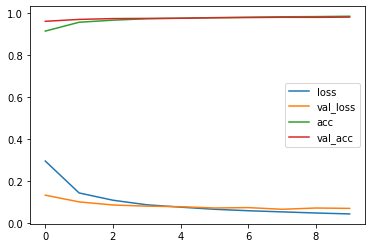

In [17]:
# Plotar a função de perda
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

# Plotar a acurácia
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()

# Avaliar o modelo com a base de teste
print( model.evaluate(x_test, y_test) )

Efetuar predições

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc062b27350>)

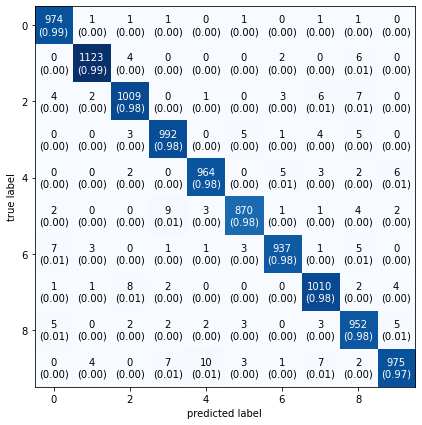

In [18]:
# Efetuar predições
y_pred = model.predict(x_test).argmax(axis=1)

# Mostrar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, figsize=(7, 7),
show_normed=True)

Mostrar algumas classificações erradas

Text(0.5, 1.0, 'True label: 9 Predicted: 4')

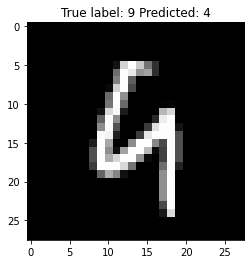

In [23]:
# mostrar algumas classificações erradas
import numpy as np
misclassified = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified)
plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
plt.title("True label: %s Predicted: %s" % (y_test[i], y_pred[i]))